# Homework 5:
Duo Xu

In [75]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize as opt

In [94]:
import pickle

tr_file  = "ap17_xpcont_train.pickle"
val_file = "ap17_xpcont_validation.pickle"


with open(tr_file, 'rb') as f1:
    data_tr = pickle.load(f1)

with open(val_file, 'rb') as f2:
    data_val = pickle.load(f2)

## Problem 1. 

RMS of training set = 151.046525277633
RMS of validation set = 175.68343620283505


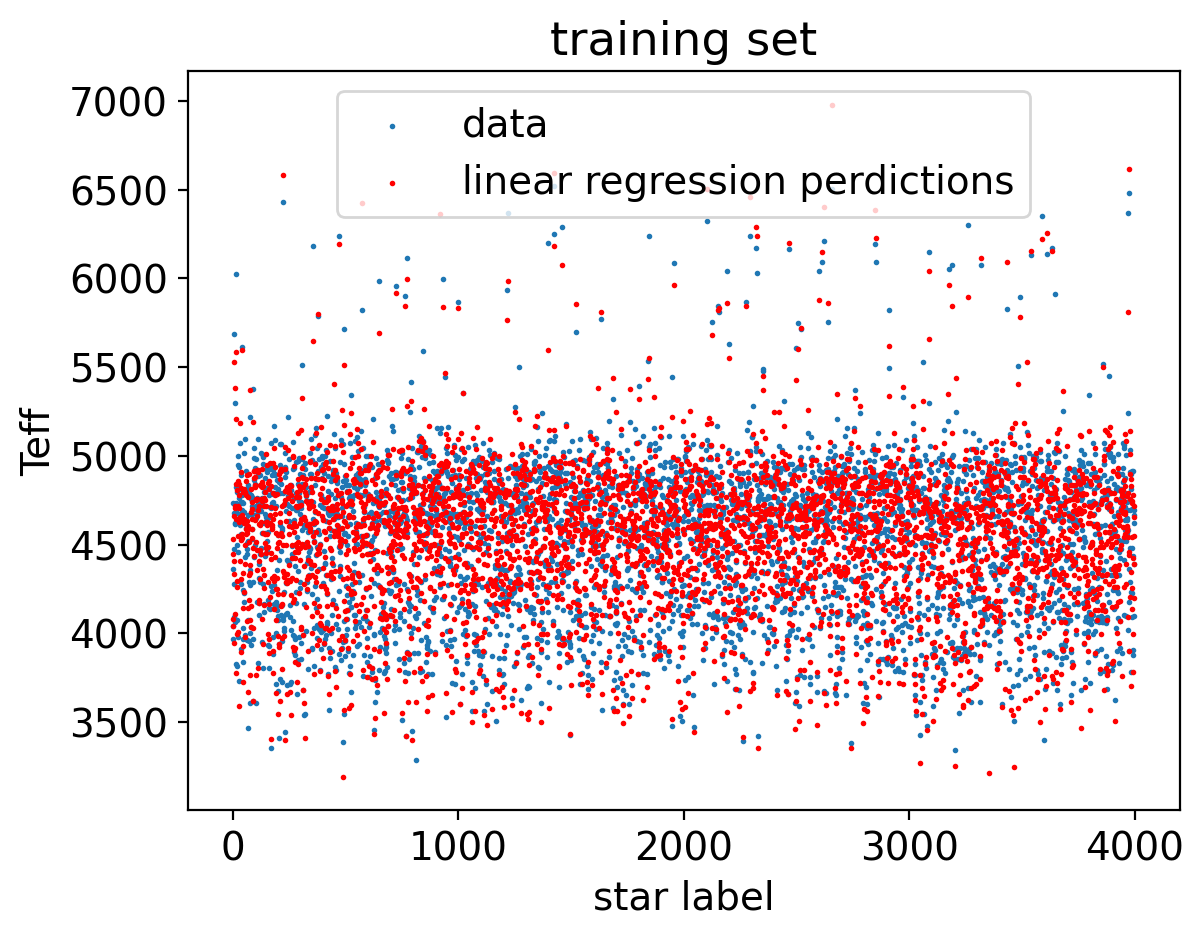

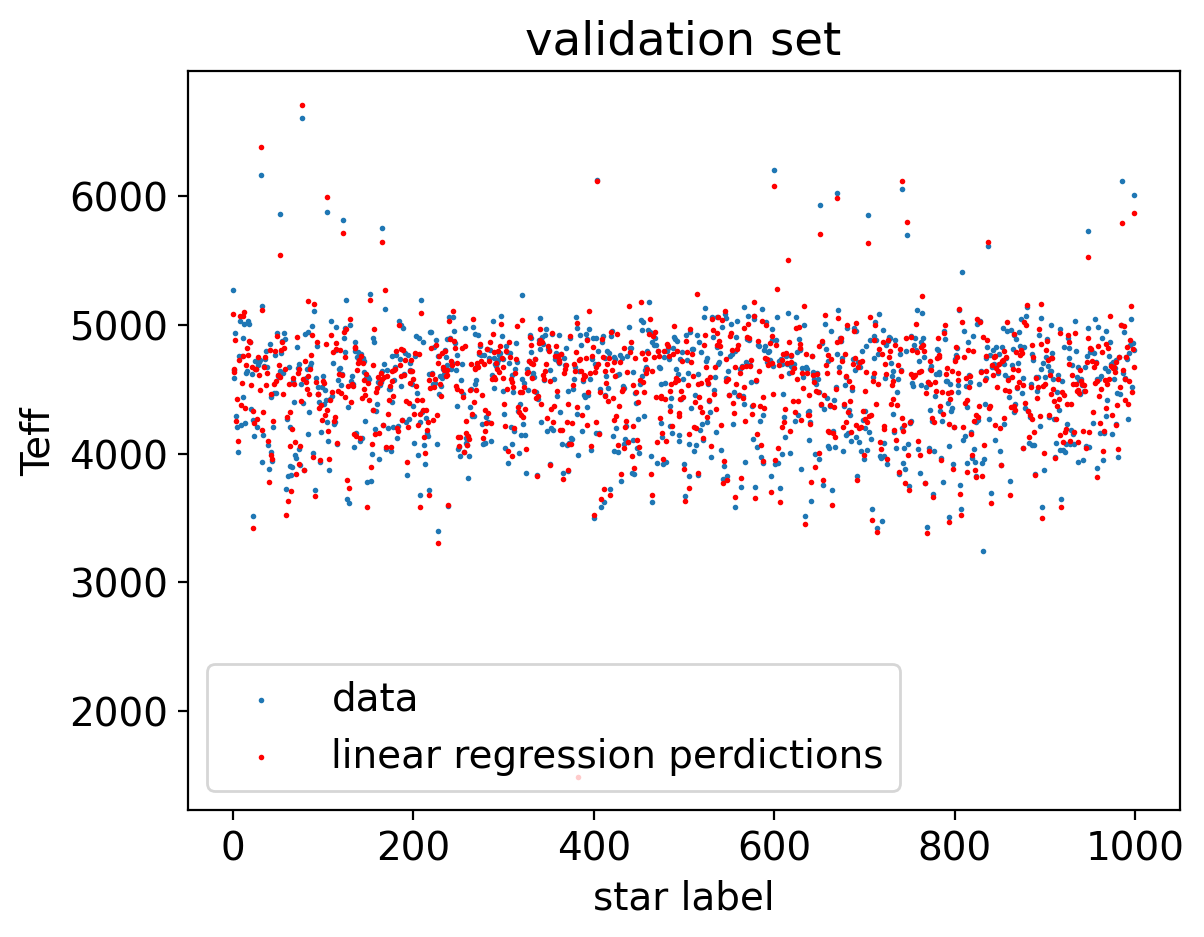

In [102]:
Xbp = data_tr['bp_coef']
Xrp = data_tr['rp_coef']

xbp = np.zeros((4000, 8))
xrp = np.zeros((4000, 8))
x = np.zeros((4000, 16))
for i in range(len(xbp)):
    xbp[i] = Xbp[i][:8]/Xrp[i][0]
    xrp[i] = Xrp[i][:8]/Xrp[i][0]
    x[i] = np.append(xbp[i],xrp[i])


XTX = np.matmul(np.transpose(x),x)
XY = np.matmul(np.transpose(x), data_tr['labels'][:,0])
thetahat = np.linalg.solve(XTX, XY)

bestfitval = bestfit(data_tr['labels'][:,0], x).x

plt.figure()
plt.scatter(range(4000), data_tr['labels'][:,0], s= 1, label = 'data')
plt.scatter(range(4000), np.matmul(x, thetahat), color='r', s = 1, label = 'linear regression perdictions')
plt.title('training set')
plt.xlabel('star label')
plt.ylabel('Teff')
plt.legend()

Xbpv = data_val['bp_coef']
Xrpv = data_val['rp_coef']

xbpv = np.zeros((1000, 8))
xrpv = np.zeros((1000, 8))
xv = np.zeros((1000, 16))
for i in range(len(xbpv)):
    xbpv[i] = Xbpv[i][:8]/Xrpv[i][0]
    xrpv[i] = Xrpv[i][:8]/Xrpv[i][0]
    xv[i] = np.append(xbpv[i],xrpv[i])

plt.figure()
plt.scatter(range(1000), data_val['labels'][:,0], s=1, label = 'data')
plt.scatter(range(1000), np.matmul(xv, thetahat), color='r', s=1, label = 'linear regression perdictions')
plt.title('validation set')
plt.xlabel('star label')
plt.ylabel('Teff')
plt.legend()

rmstr = np.sqrt((1/len(data_tr['labels'][:,0]))*sum((data_tr['labels'][:,0] - np.matmul(x, thetahat))**2))
print('RMS of training set =', rmstr)

rmsval = np.sqrt((1/len(data_val['labels'][:,0]))*sum((data_val['labels'][:,0] - np.matmul(xv, thetahat))**2))
print('RMS of validation set =', rmsval)

## Problem 2.

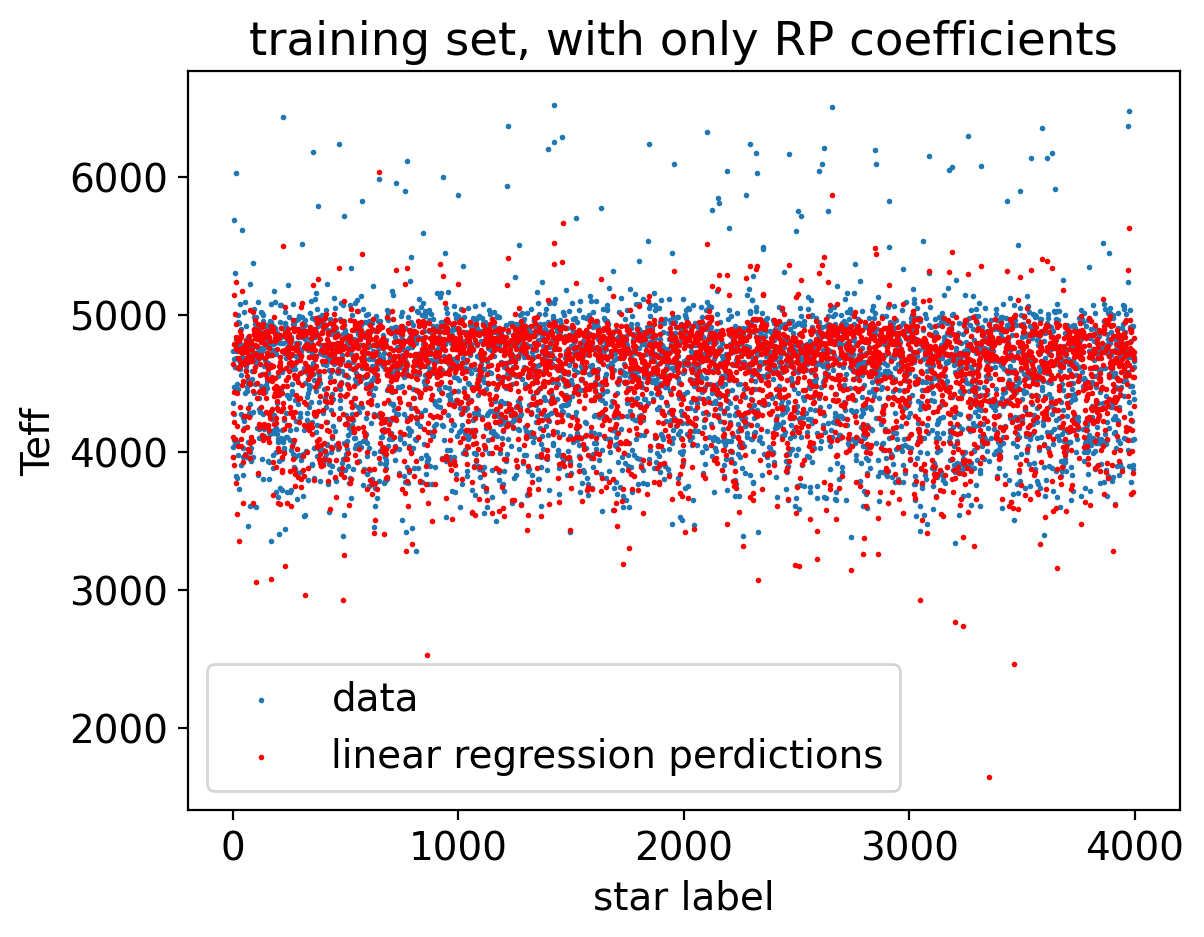

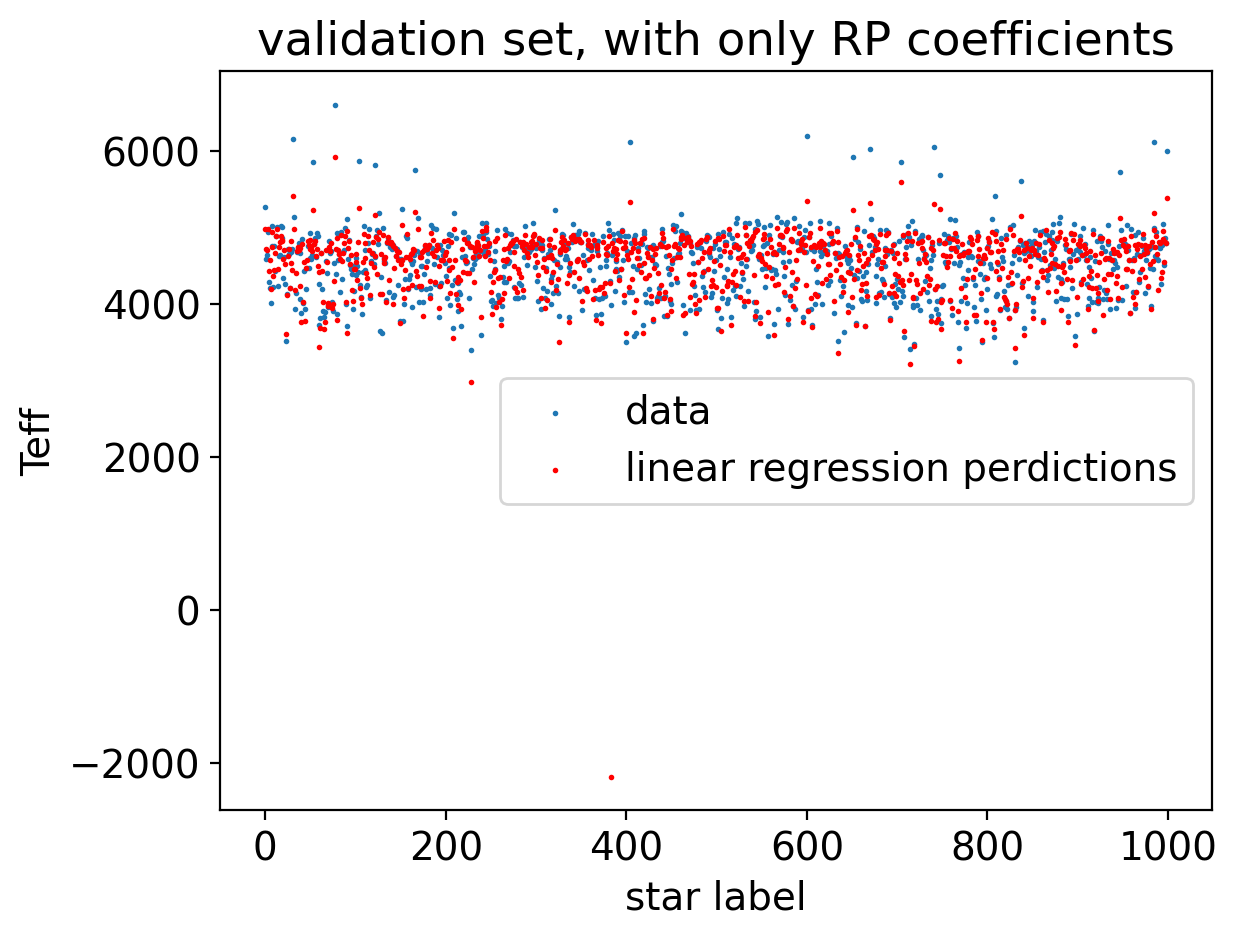

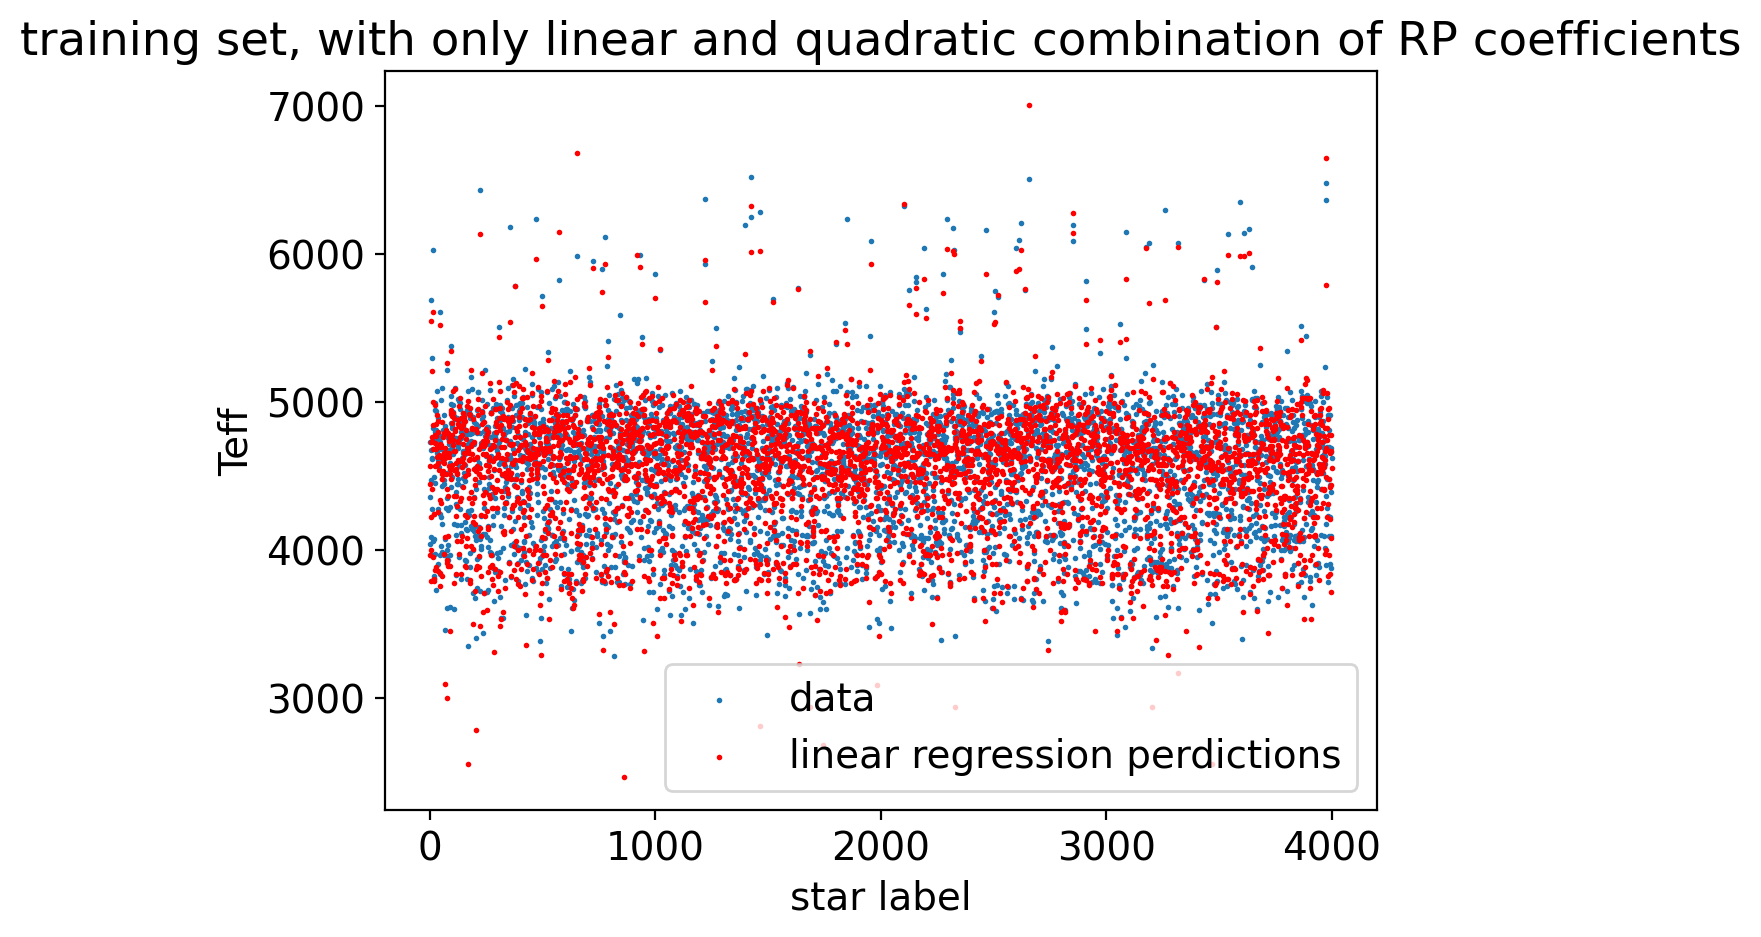

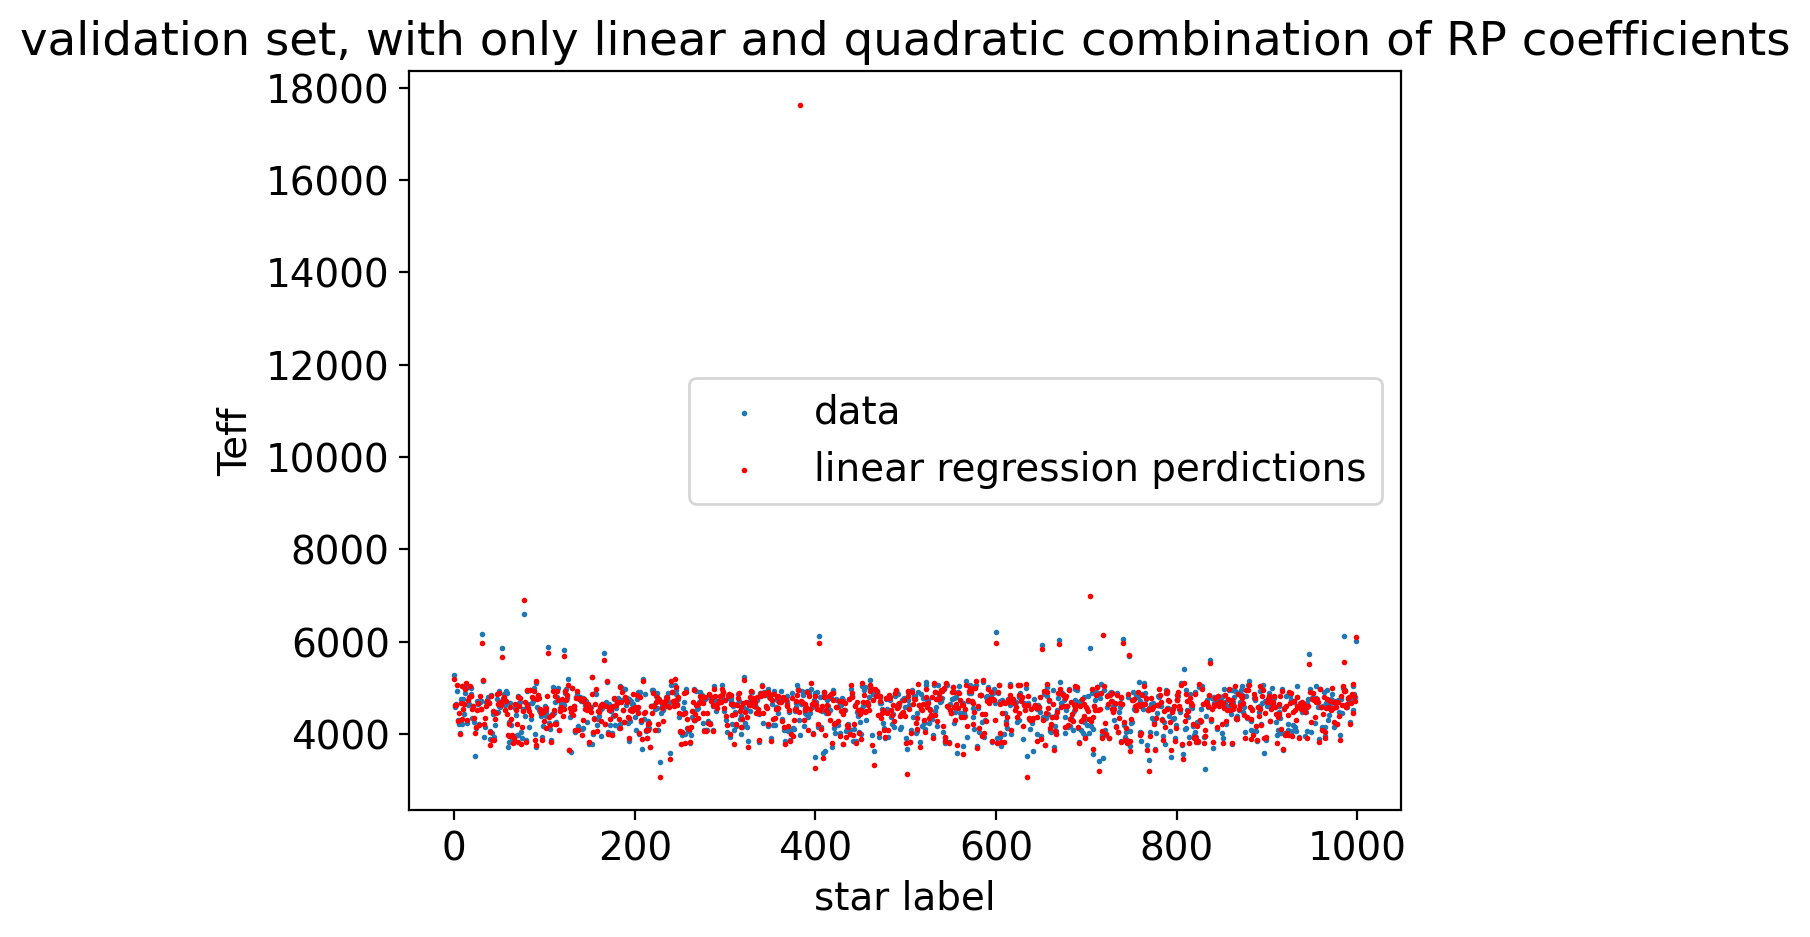

In [98]:
XTX_rp = np.matmul(np.transpose(xrp),xrp)
XY_rp = np.matmul(np.transpose(xrp), data_tr['labels'][:,0])
thetahat_rp = np.linalg.solve(XTX_rp, XY_rp)

plt.figure()
plt.scatter(range(4000), data_tr['labels'][:,0], s = 1, label = 'data')
plt.scatter(range(4000), np.matmul(xrp, thetahat_rp), color='r', s = 1, label = 'linear regression perdictions')
plt.title('training set, with only RP coefficients')
plt.xlabel('star label')
plt.ylabel('Teff')
plt.legend()

plt.figure()
plt.scatter(range(1000), data_val['labels'][:,0], s = 1, label = 'data')
plt.scatter(range(1000), np.matmul(xrpv, thetahat_rp), color='r', s = 1, label = 'linear regression perdictions')
plt.title('validation set, with only RP coefficients')
plt.xlabel('star label')
plt.ylabel('Teff')
plt.legend()

xrp2 = np.zeros((4000, 64))
for i in range(len(xrp)):
    xrp2[i] = np.reshape(np.outer(xrp[i], xrp[i]), 64)

XTX_rp2 = np.matmul(np.transpose(xrp2),xrp2)
XY_rp2 = np.matmul(np.transpose(xrp2), data_tr['labels'][:,0])
thetahat_rp2 = np.linalg.solve(XTX_rp2, XY_rp2)

plt.figure()
plt.scatter(range(4000), data_tr['labels'][:,0], s = 1, label = 'data')
plt.scatter(range(4000), np.matmul(xrp2, thetahat_rp2), color='r', s = 1, label = 'linear regression perdictions')
plt.title('training set, with only linear and quadratic combination of RP coefficients')
plt.xlabel('star label')
plt.ylabel('Teff')
plt.legend()


xrpv2 = np.zeros((1000, 64))
for i in range(len(xrpv)):
    xrpv2[i] = np.reshape(np.outer(xrpv[i], xrpv[i]), 64)

plt.figure()
plt.scatter(range(1000), data_val['labels'][:,0], s = 1, label = 'data')
plt.scatter(range(1000), np.matmul(xrpv2, thetahat_rp2), color='r', s = 1, label = 'linear regression perdictions')
plt.title('validation set, with only linear and quadratic combination of RP coefficients')
plt.xlabel('star label')
plt.ylabel('Teff')
plt.legend()

In [100]:
rmsrp = np.sqrt((1/len(data_tr['labels'][:,0]))*sum((data_tr['labels'][:,0] - np.matmul(xrp, thetahat_rp))**2))
print('RMS of training set =', rmsrp)

rmsrpv = np.sqrt((1/len(data_val['labels'][:,0]))*sum((data_val['labels'][:,0] - np.matmul(xrpv, thetahat_rp))**2))
print('RMS of validation set =', rmsrpv)

rmsrp2 = np.sqrt((1/len(data_tr['labels'][:,0]))*sum((data_tr['labels'][:,0] - np.matmul(xrp2, thetahat_rp2))**2))
print('RMS of training set (linear and quadratic combinations) =', rmsrp2)

rmsrpv2 = np.sqrt((1/len(data_val['labels'][:,0]))*sum((data_val['labels'][:,0] - np.matmul(xrpv2, thetahat_rp2))**2))
print('RMS of validation set (linear and quadratic combinations) =', rmsrpv2)

RMS of training set = 216.63717526591444
RMS of validation set = 279.2110902411644
RMS of training set (linear and quadratic combinations) = 169.0499056896373
RMS of validation set (linear and quadratic combinations) = 469.8722350019923


## Problem 3.

In [103]:
with open("data.pkl", "rb") as handle:
    Data = pickle.load(handle).T

In [104]:
time = Data[0]
noise = Data[1]
data = Data[12]

In [90]:
def kernel(d, l):
    return (1 + (np.sqrt(3)*d/l))*np.exp(-np.sqrt(3)*d/l)

C = np.zeros((len(noise),len(noise)))
for i in range(len(noise)):
    C[i][i] = noise[i]

K1 = np.zeros((len(time),len(time)))
K2 = np.zeros((len(time),len(time)))
K3 = np.zeros((len(time),len(time)))
for i in range(len(time)):
    for j in range(len(time)):
        K1[i][j] = kernel(abs(time[i] - time[j]), 3)
        K2[i][j] = kernel(abs(time[i] - time[j]), 30)
        K3[i][j] = kernel(abs(time[i] - time[j]), 300)
        

In [91]:
t = np.arange(-50, 1075, 0.1)

K_1 = np.zeros((len(t), len(time)))
K_2 = np.zeros((len(t), len(time)))
K_3 = np.zeros((len(t), len(time)))
for i in range(len(t)):
    for j in range(len(time)):
        K_1[i][j] = kernel(abs(t[i] - time[j]), 3)
        K_2[i][j] = kernel(abs(t[i] - time[j]), 30)
        K_3[i][j] = kernel(abs(t[i] - time[j]), 300)


In [92]:
Yhat1 = np.matmul(K_1, np.linalg.solve((K1 + C), data))
Yhat2 = np.matmul(K_2, np.linalg.solve((K2 + C), data))
Yhat3 = np.matmul(K_3, np.linalg.solve((K3 + C), data))

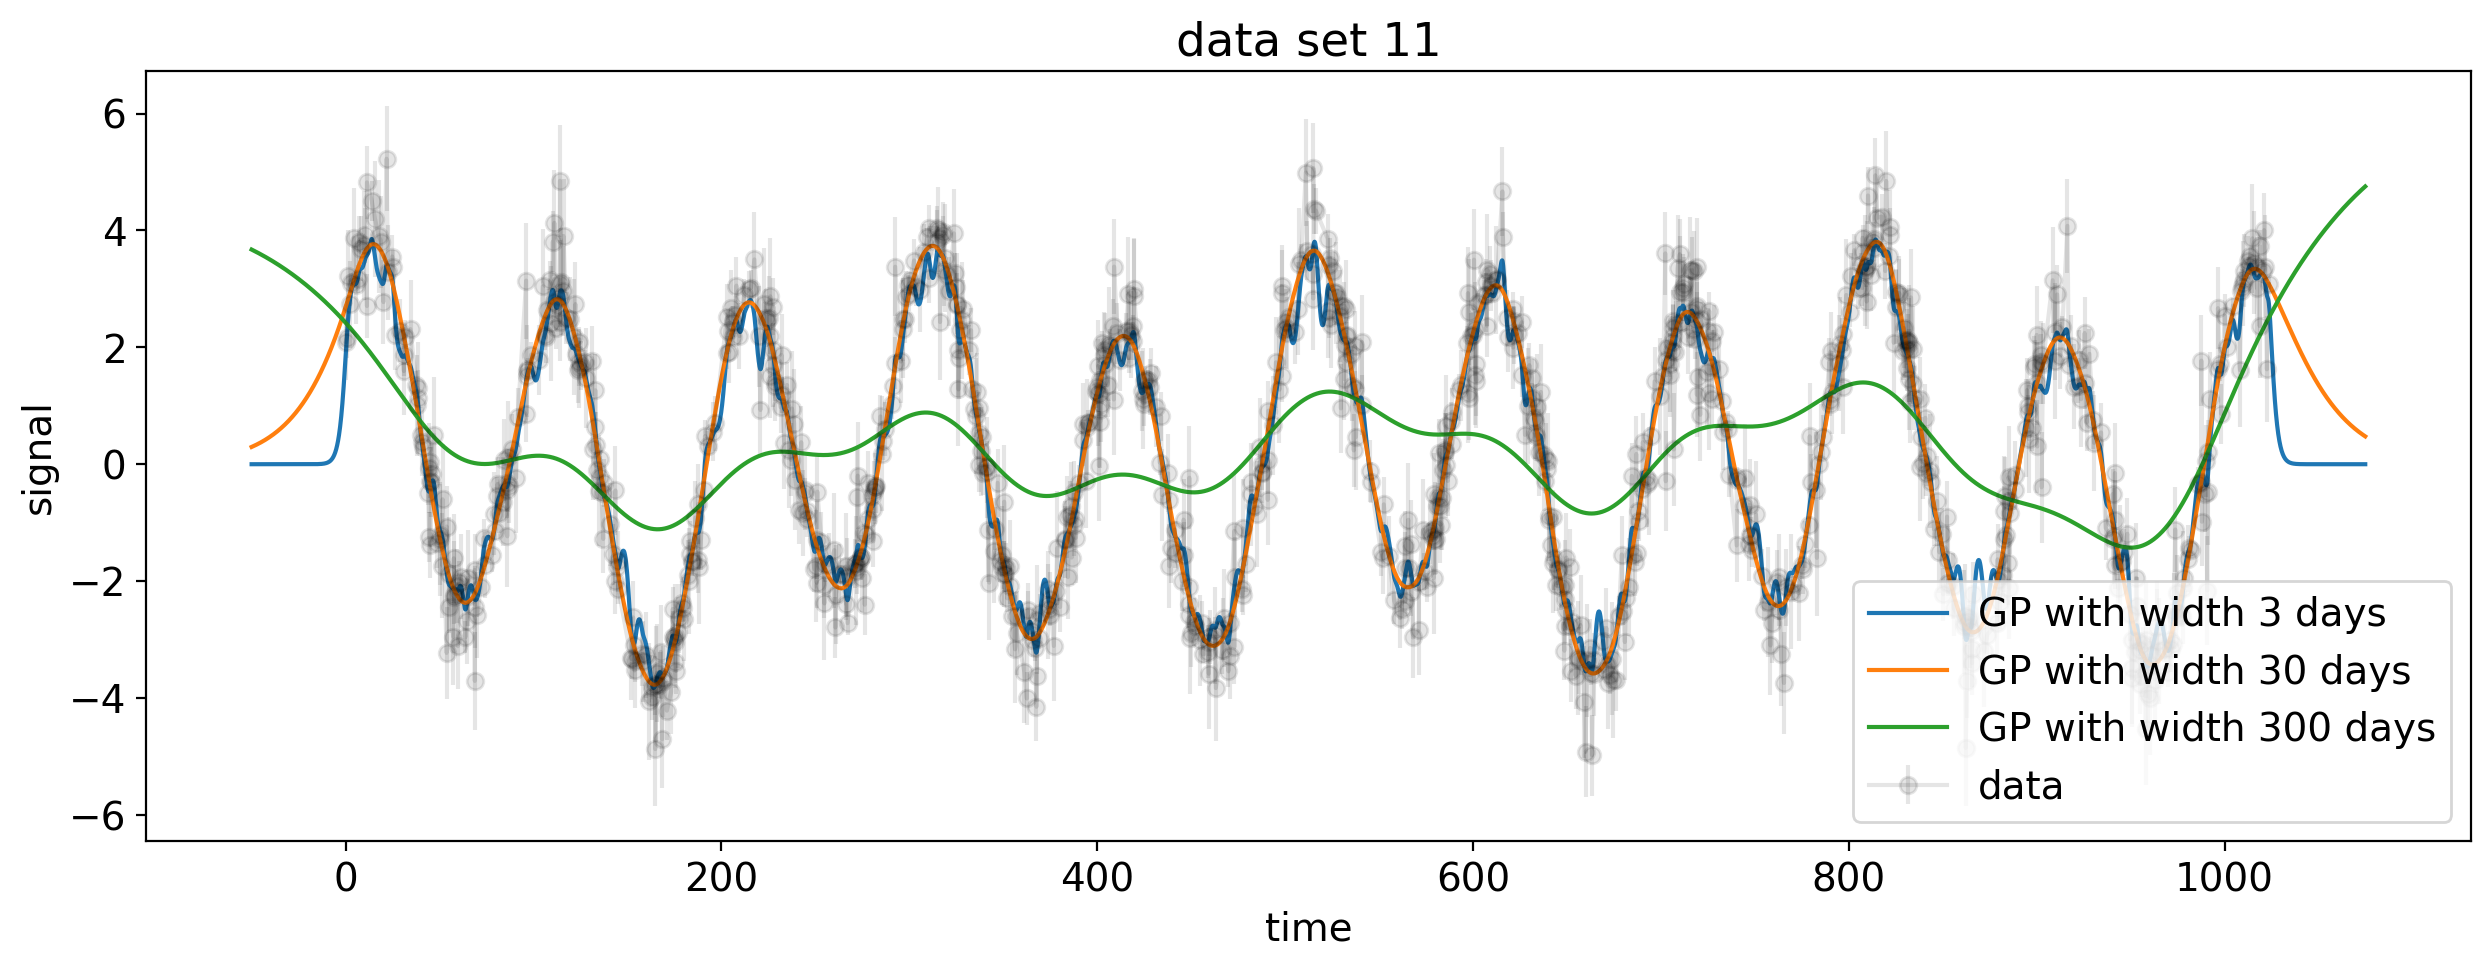

In [93]:
plt.figure(figsize=(15, 5))
plt.errorbar(time, data, yerr=noise,
            color="k", marker="o", alpha=0.1, label = 'data')
plt.plot(t, Yhat1, label = 'GP with width of 3 days')
plt.plot(t, Yhat2, label = 'GP with width of 30 days')
plt.plot(t, Yhat3, label = 'GP with width of 300 days')
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 11")
plt.legend()